# Assignment 2 - Probability and Statistics, Ethics and privacy

This assignment is worth 10% of your final grade.

It is due at **6pm on Thursday 17 August**, and should be submitted as a single Jupyter Notebook, through the "Assignment 2" link in Blackboard

The assignment makes use of the `scipy.stats` package and the `statsmodels.formula.api` package.  It draws on material from Weeks 3 and 4, lectured by Richard Arnold.

When answering questions show any relevant Python code along with your answers.

Also when asked for numerical answers, make sure you quote these explicitly.  e.g. if the answer to a question is just one value from a table, make sure you explicitly refer to that value so that it is clear that you know which is the relevant entry in the table.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# Privacy, Security, Confidentiality and Ethics

1\. The Integrated Data Infrastructure (IDI) created by Statistics New Zealand links data from a variety of different sources, and is used as a policy research tool.

   (a) In a paragraph of writing (150-200 words), discuss the Privacy, Security and Confidentiality issues that arise in the creation and operation of the IDI, and how these issues are handled.
   
There are many privacy, security and confidentiality issues that arise in the creation and operation of the IDI because it contains a lot of sensitive and personal information. 
Privacy issues: Since the IDI links data sources together, it could unintentionally identify individuals, violating their right to privacy. If enough attributes/variables are combined, it may be possible to identify specific individuals even if unique identifiers are removed. This is a risk to privacy as identity theft could occur, where if someone knows enough about you, they could impersonate you. To handle this privacy issue, data are de-identified in the IDI before it's released to ensure anonymity is maintained and identities cannot be easily obtained from the data. Another privacy issue is that individuals may not know about their data being used in the IDI. Whenever individuals provide data, they are giving up their privacy and consenting to a specific use.  This is handled as the deputy Government Statistician Dr Craig Jones outlines that they use the IDI to inform policy and to evaluate if policies are working or not. Access to the IDI is carefully managed.

Security issues: Since the IDI holds lots of sensitive information about individuals, it has the potential to be highly targeted for cyberattacks and misuse of data. These breaches are an issue because peoples financial information could be exposed. This is handled as Stats NZ tightly holds onto data and rarely shares it with other organisations and outside parties. Anyone using the IDI must demonstrate how their research will benefit the communities being researched, also controlling who gets access to data. External researchers are vetted, and have to sign a lifelong declaration of secrecy, promising not to reveal any private information they may see. Researchers are only given access to data that is relevant to their research and it can only be accessed from a Data Lab with no internet access. The IDI is on a separate server.

Confidentiality issues: The confidentiality issues that arise when creating the IDI is that datasets are linked by demographic information such as name, sex, date of birth, and address. Anonymity is maintained by encrypting data in the IDI that can identify people. However, there are insider threats, where people authorised to access the IDI could misuse the data or leak it intentionally. This is handled as the Ngā Tikanga Paihere framework was developed by Stats NZ, which is meant to inform users on ethical and culturally appropriate data usage.

   (b) In a few sentences give your view of the risks associated with the IDI, specifically referring to the Social Licence.
   
The social license has the potential to be violated due to the risks associated with the IDI. Risks include privacy breaches, the potential misuse of data, and unauthorised access to data. Public trust has the potential to be lost if these risks aren't considered and attended to by having transparency around data usage, intense security measures, and clarity on ethical and legal use. Since the IDI contains sensitive and personal information, updating and adhering to the social license for the IDI is important. The social license enables respect toward peoples rights to privacy and protects their data, yet also allows for important research to be conducted and checks if policies are working or not.

[8 Marks (6+2)]

2\. Consider the following table of counts of age and political affiliation (left-right) in a small community (the data are in RiskyTable.csv)

In [3]:
rtab = pd.read_csv("RiskyTable.csv")
rtab

,Age Group,Left learning,Centre-left,Centre-right,Right leaning,Total
0,15-24,1,0,0,1,2
1,25-34,2,0,0,0,2
2,35-44,1,3,4,3,11
3,45-54,0,4,3,1,8
4,55-64,1,0,3,2,6
5,65+,2,7,3,2,14
6,Total,7,14,13,9,43


(a) Assuming that people within this community either know or can easily guess each other's ages, but don't know each other's political beliefs, give a brief discussion of the confidentiality risks posed by this table.  Identify the riskiest cells, contrasting the risks for informed and uninformed adversaries/intruders.  [2 Marks]

Aggregation has been done for age group, yet since there are only a total of 43 people in this community it makes it quite easy for individuals political beliefs to be identified based on their age. The riskiest cells are the Age Group 15-24 row as it represents a disclosure risk. An informed intruder may be the person who is the person represented in the 15-24 age group and has left leaning political beliefs. They then now know that the other person in the same age group has right leaning political beliefs. In constrast, an uninformed intruder would not know the information that the informed intruder has. An uninformed intruder would be someone from within the company contracting someone else outside of the company to attack them to tell the person in the company what they find. An uninformed intruder wouldn't know the age of people in the community specifically but could guess it.  Therefore someone else in the community from a different age group may be able to guess which person in the 15-24 age group has right leaning political beliefs.

(b) How could the table be made less risky if it is to be released? [3 Marks]

Doing a random round can help the table be made less risky if it is to be released. Cell suppression could also be done (blanking out cells). The table below is less risky than it was before, however it is still easy to identify those in the 25-34 age group with left leaning political beliefs. Unfortunately in this case, the cells don't add to margins. 

In [4]:
rtab = pd.DataFrame({'Age Group':['15-24', '25-34', '35-44', '45-54','55-64','65+','Total'],
                     'Left leaning':[0,3,0,0,0,3,6],
                     'Centre-left':[0,0,3,6,0,6,15],
                     'Centre-right':[0,0,6,3,3,3,15],
                     'Right leaning':[0,0,3,0,3,3,9],
                     'Total':[3,3,12,9,6,15,45]})
rtab

,Age Group,Left leaning,Centre-left,Centre-right,Right leaning,Total
0,15-24,0,0,0,0,3
1,25-34,3,0,0,0,3
2,35-44,0,3,6,3,12
3,45-54,0,6,3,0,9
4,55-64,0,0,3,3,6
5,65+,3,6,3,3,15
6,Total,6,15,15,9,45


In [5]:
# Cell suppression 
# This way ensures no individuals political beliefs are fully exposed. 
rtab = pd.DataFrame({'Age Group':['15-24', '25-34', '35-44', '45-54','55-64','65+','Total'],
                     'Left leaning':[1,2,1,0,1,2,7],
                     'Centre-left':[0,0,3,4,0,7,14],
                     'Centre-right':[0,0,4,3,3,3,13],
                     'Right leaning':[1,0,3,1,2,2,9],
                     'Total':[2,2,11,8,6,14,43]})

rtab.loc[rtab['Age Group'].isin(['15-24', '25-34']), 'Left leaning'] = ''
rtab.loc[rtab['Age Group'].isin(['15-24', '25-34']), 'Right leaning'] = ''
rtab.loc[rtab['Age Group'].isin(['15-24', '25-34']), 'Centre-right'] = ''

rtab

,Age Group,Left leaning,Centre-left,Centre-right,Right leaning,Total
0,15-24,,0,,,2
1,25-34,,0,,,2
2,35-44,1,3,4,3,11
3,45-54,0,4,3,1,8
4,55-64,1,0,3,2,6
5,65+,2,7,3,2,14
6,Total,7,14,13,9,43


# Probability distributions

Note: 

  * A **probability mass function** $P(X=x)$ is the probability that a discrete or categorical random variable $X$ takes a particular value $x$
  * A **cumulative distribution function** $P(X\leq x)$ is the probability that a numerical random variable $X$ (which can be discrete or continuous) takes a value less than or equal to a particular value $x$.


3\. A Poisson random variable is often used to model counts of customer arrivals in a shop.  Assume that the number of customers to arrive in any given hour follows a Poisson(4) distribution.  Compute and plot the probabililty distribution of a Poisson(4) distribution.  (Plot the distribution over the range 0 to 15.)  [3 Marks]

[1.83156389e-02 7.32625556e-02 1.46525111e-01 1.95366815e-01
 1.95366815e-01 1.56293452e-01 1.04195635e-01 5.95403626e-02
 2.97701813e-02 1.32311917e-02 5.29247668e-03 1.92453697e-03
 6.41512324e-04 1.97388408e-04 5.63966879e-05 1.50391168e-05]


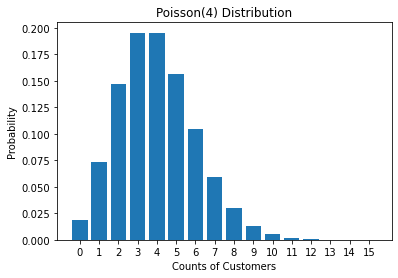

In [6]:
# Probability of X ~ Poisson(4)
from scipy.stats import poisson

my_lambda = 4
plot = np.arange(0,16)

# Compute the probability 
prob = poisson.pmf(plot, my_lambda)
print(prob)

# Plot the probability distribution for X ~ Poisson(4)
plt.bar(plot, prob, align='center')
plt.xlabel('Counts of Customers')
plt.ylabel('Probability')
plt.title('Poisson(4) Distribution')
plt.xticks(plot)
plt.show()

4\.  What is the **support** or **sample space** of the Poisson(4) distribution?  [1 Mark]

The support is {0, 1, 2, 3, ...}, meaning that a Poisson(4) distribution models the probability of customer arrivals in a shop occurring 0, 1, 2, 3... times within any given hour, where on average 4 customers enter the store. 

5\. Use the vector of probabilities to calculate the expected (mean) value of $X$. i.e. on average how many customers arrive per hour in this shop?  [1 Mark]

In [7]:
expected_value = np.sum(plot * prob) # multiplies each value in the range of 0-15 with its corresponding prob
print("Expected value (mean):", expected_value) #np.sum adds together the values

# On average 4 customers arrive per hour in this shop 

Expected value (mean): 3.9999202730900674


6\. What is the probability that $X$ is 3, i.e. that exactly 3 customers arrive in the shop in a given hour?  [1 Mark]

In [8]:
# P(X=3) if X~Poisson(4)

my_lambda = 4
k = 3
prob = poisson.pmf(k, my_lambda)
print("P(X=",k,") = ", prob,sep="")

P(X=3) = 0.19536681481316454


7\. What is the probability that $X$ is less than or equal to 3? [1 Mark]

In [9]:
# P(X<=3) if X~Poisson(4)

cumulative_prob = poisson.cdf(k, my_lambda)
print("P(X<=",k,") = ", cumulative_prob,sep="")

P(X<=3) = 0.43347012036670896


8\. What is the probability that $X$ is more than 3 but less than 6?  [1 Mark]

In [10]:
# P(3 < X < 6) if X~Poisson(4)

my_lambda = 4
k1 = 3 # 4 is more than 3
k2 = 6 # 5 is less than 6

# Calculate the cumulative probabilities 
prob = poisson.cdf(k2 - 1, my_lambda) - poisson.cdf(k1, my_lambda) # I did k2 - 1 as less than 6 is 5 

print("P(", k1, "<X<", k2,") = P(X<", k2, \
      ") - P(X<", k1,") = ", prob, sep="")

P(3<X<6) = P(X<6) - P(X<3) = 0.3516602666636962


## Probabilities from Data

Read the Spotify_Song_Attributes.csv data set of characteristics of 10080 songs on the Spotify music streaming platform, which you can download from Canvas.

You will also need to consult the accompanying information file Spotify-Information.csv in order to interpret the content of the data set.

Sourced from: B. Senopati, "Harmonizing the Hits: Analyzing the Spotify Song Attributes Dataset" https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

In [11]:
df = pd.read_csv("Spotify_Song_Attributes.csv")
information = pd.read_csv("Spotify-Information.csv")

9\. Treating this data set as a random sample of all songs on the platform, estimate the proportion of Spotify songs that have a time signature of 4.  [1 Mark]

In [12]:
spot = df['time_signature'].value_counts().sort_index()
time_sort = pd.DataFrame({'counts':spot,'probs':spot/sum(spot)})
number = 0.905771
print("The probability that a randomly selected song has a time siqnature of 4 is:")
print("P(X=4)=",number)
time_sort

The probability that a randomly selected song has a time siqnature of 4 is:
P(X=4)= 0.905771


,counts,probs
0.0,4,0.000420
1.0,66,0.006925
3.0,700,0.073452
4.0,8632,0.905771
5.0,128,0.013431


10\. What is the probability that a song is both in a minor key (minor mode) and has a time signature of 3? [1 Mark]

In [13]:
# Joint probability = P(events A and B both occur at the same time)
# A = the event that a song is in a minor key (M)
# B = the event that a song has a time signature of 3 (T)
# Mode, 1 = major, 0 = minor

# Joint probabilities P(M, T) by minor key and time signature
prob = pd.crosstab(df['mode'], df['time_signature'],
           margins=True, margins_name='Total',normalize = 'all')

print("The probability that a randomly chosen song is in a minor key and has a time signature of 3 is: \
\n Pr(M ='0',T = '3') = 0.024554")

prob 

The probability that a randomly chosen song is in a minor key and has a time signature of 3 is: 
 Pr(M ='0',T = '3') = 0.024554


time_signature,0.0,1.0,3.0,4.0,5.0,Total
mode,,,,,,
0.0,0.00021,0.002308,0.024554,0.354250,0.006296,0.387618
1.0,0.00021,0.004617,0.048898,0.551522,0.007135,0.612382
Total,0.00042,0.006925,0.073452,0.905771,0.013431,1.000000


11\. What is the probability that a song is in a minor key given that it has a time signature of 3? [1 Mark]

In [14]:
# A = the event that a song is in a minor key (M)
# B = the event that a song has a time signature of 3 (T)

# The conditional probability P(M|T) = P(event A occurs given that event B has occured)
prob = pd.crosstab(df['mode'], df['time_signature'],
           margins=True, margins_name='Total',normalize = 'index')

# The probability that a randomly chosen minor key song has a time signature of 3
print("Pr(T = '3'| M = '0') = 0.063346")
prob

Pr(T = '3'| M = '0') = 0.063346


time_signature,0.0,1.0,3.0,4.0,5.0
mode,,,,,
0.0,0.000541,0.005956,0.063346,0.913914,0.016243
1.0,0.000343,0.007539,0.079849,0.900617,0.011652
Total,0.000420,0.006925,0.073452,0.905771,0.013431


12\. What is the probability that a song has a time signature of 3 given that it is in a minor key? [1 Mark]

In [15]:
# A = the event that a song is in a minor key (M)
# B = the event that a song has a time signature of 3 (T)

# The conditional probability P(T|M) = P(event B occurs given that event A has occured)
prob = pd.crosstab(df['mode'], df['time_signature'],
           margins=True, margins_name='Total',normalize = 'columns')

# The probability that a randomly chosen minor key song has a time signature of 3
print("Pr(M = '0'| T = '3') = 0.334286")
prob

Pr(M = '0'| T = '3') = 0.334286


time_signature,0.0,1.0,3.0,4.0,5.0,Total
mode,,,,,,
0.0,0.5,0.333333,0.334286,0.391103,0.46875,0.387618
1.0,0.5,0.666667,0.665714,0.608897,0.53125,0.612382


## Model Fitting

Use the Spotify data for the remaining questions on Model Fitting

13\. Draw a scatter plot of the Energy of each song (on the x-axis) and its Loudness.  Using different colours or different plot symbols, distinguish the songs that have a time signature of 4 (four beats per bar) from all other time signatures. [3 Marks]

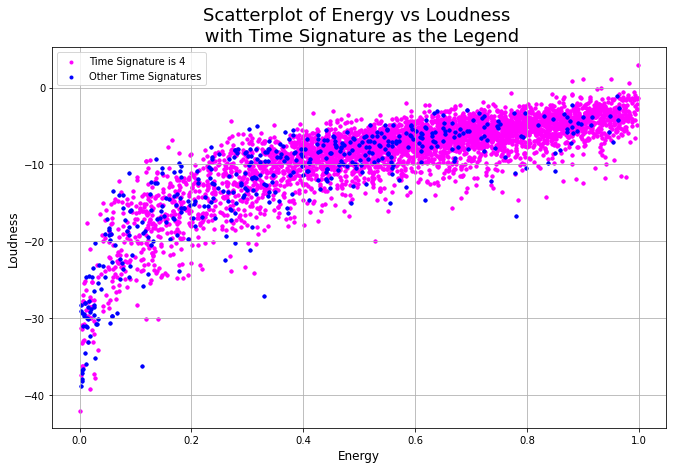

In [17]:
# energy (x-axis)
# loudness (y-axis) 
# time signature of 4 (legend)
plt.figure(figsize=(11, 7))

# For time_signature == 4
plt.scatter(df[df['time_signature'] == 4]['energy'],
            df[df['time_signature'] == 4]['loudness'],
            label='Time Signature is 4', color='magenta', marker='.')

# For time_signature != 4
plt.scatter(df[df['time_signature'] != 4]['energy'],
            df[df['time_signature'] != 4]['loudness'],
            label='Other Time Signatures', color='blue', marker='.')

plt.xlabel('Energy', fontsize = 12)
plt.ylabel('Loudness', fontsize = 12)
plt.title('Scatterplot of Energy vs Loudness \n with Time Signature as the Legend', fontsize = 18)
plt.legend()
plt.grid(True)
plt.show()

14\. Create a new column, logEnergy, in the data set.  Draw a scatter plot of the log of the Energy of each song on the x-axis and its Loudness on the y-axis.  Again distinguish songs with 4 beats per bar from all other time signatures. [1 Mark]

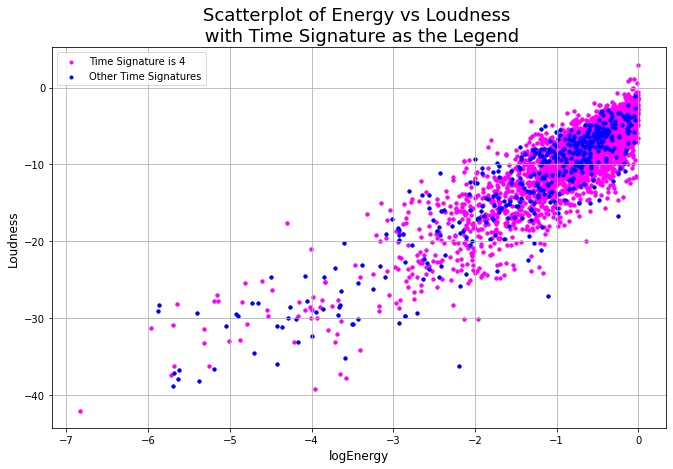

In [18]:
df['logEnergy'] = np.log(df['energy'])

plt.figure(figsize=(11, 7))

# For time_signature == 4
plt.scatter(df[df['time_signature'] == 4]['logEnergy'],
            df[df['time_signature'] == 4]['loudness'],
            label='Time Signature is 4', color='magenta', marker='.')

# For time_signature != 4
plt.scatter(df[df['time_signature'] != 4]['logEnergy'],
            df[df['time_signature'] != 4]['loudness'],
            label='Other Time Signatures', color='blue', marker='.')

plt.xlabel('logEnergy', fontsize = 12)
plt.ylabel('Loudness', fontsize = 12)
plt.title('Scatterplot of Energy vs Loudness \n with Time Signature as the Legend', fontsize = 18)
plt.legend()
plt.grid(True)
plt.show()

15\. The graph after the log transformation looks very different: why are the logged data more suitable for model fitting than the original data?  [1 Mark]

The logged data is more suitable for model fitting than the original data because the variances are now stabilised. The relationship between energy and loudness is now more linear. Funnelling is reduced when the log of energy is taken. The transformed energy data is more symmetric than the raw data, making it more suitable for the model fitting. 

16\. Fit a regression model for loudness as predicted by log Energy.  
  (a) Print out a summary of the model fit

In [19]:
# Fit a regression model
model = smf.ols('loudness ~ logEnergy', data=df).fit()

# a) Print out a summary of the model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               loudness   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 3.372e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:31:29   Log-Likelihood:                -22411.
No. Observations:                9530   AIC:                         4.483e+04
Df Residuals:                    9528   BIC:                         4.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0528      0.036   -111.798      0.0

(b) Plot the fitted curve onto the data

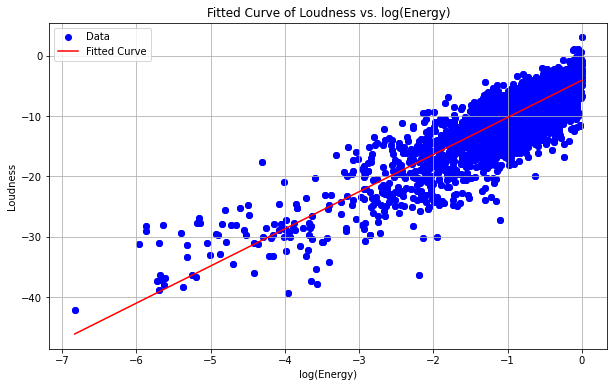

In [20]:
# b) Plot the fitted curve onto the data
logEnergy_range = np.linspace(df['logEnergy'].min(), df['logEnergy'].max(), num=100)

# Predict the corresponding loudness values using the fitted model
predicted_loudness = model.predict({'logEnergy': logEnergy_range})

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['logEnergy'], df['loudness'], label='Data', color='blue')

# Fitted curve
plt.plot(logEnergy_range, predicted_loudness, label='Fitted Curve', color='red')

plt.xlabel('log(Energy)')
plt.ylabel('Loudness')
plt.title('Fitted Curve of Loudness vs. log(Energy)')
plt.legend()
plt.grid(True)
plt.show()

(c) Draw a scatter plot of the residuals and comment on them
[7 Marks]

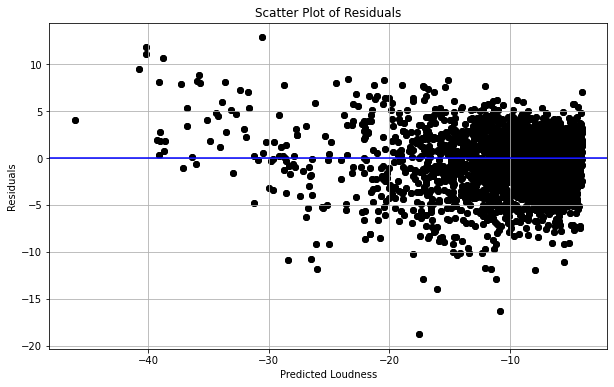

In [21]:
# c) Draw a scatter plot of the residuals and comment on them
residuals = model.resid

plt.figure(figsize=(10, 6))

# Scatter plot of residuals against predicted values
plt.scatter(model.predict(), residuals, color='black')

plt.axhline(y=0, color='blue', linestyle='-')  # Add a horizontal line at y=0

plt.xlabel('Predicted Loudness')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.grid(True)
plt.show()

# The scatterplot of residuals shows a reasonably even scatter around the zero line at all values of x
# (predicted loudness). There is some unusal spread however, but overall, the even scatter suggests that 
# the model is a good fit. 

17\. Try adding a quadratic term to the fit, and see if that improves the fit. [3 Marks]

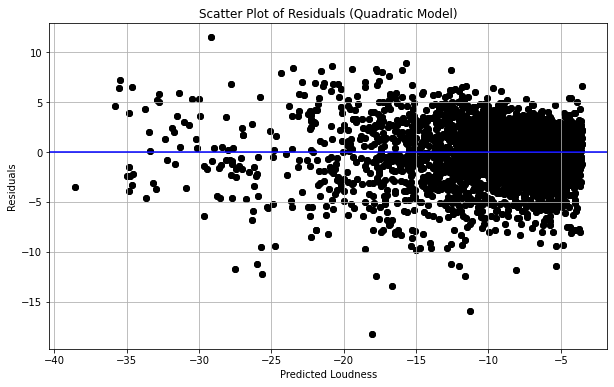

In [22]:
df['logEnergy_squared'] = df['logEnergy'] ** 2

# Fit a quadratic regression model
model_quad = smf.ols('loudness ~ logEnergy + logEnergy_squared', data=df).fit()

# Calculate residuals
residuals_quad = model_quad.resid

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of residuals against predicted values
plt.scatter(model_quad.predict(), residuals_quad, color='black')

plt.axhline(y=0, color='blue', linestyle='-')  # Add a horizontal line at y=0

plt.xlabel('Predicted Loudness')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals (Quadratic Model)')
plt.grid(True)
plt.show()

# This model with a quadratic term improves the fit of the model. Residuals are more evenly scattered around the 
# zero line, meaning this model is a better fit than the model without the quadratic term. 

[Total 40 Marks]